# Orange Quality Analysis

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

# load the dataset
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

# Functions

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
        "LDA":LinearDiscriminantAnalysis(),
        "GPC":GaussianProcessClassifier()
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

# EDA Analysis

In [3]:
df = pd.read_csv("data.csv")
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [4]:
df.dtypes

Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object

In [5]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Variety"].value_counts()

Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64

In [8]:
df["Color"].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [9]:
df["Blemishes (Y/N)"].value_counts()

Blemishes (Y/N)
N                          149
Y (Sunburn Patch)           23
Y (Scars)                   17
Y (Minor)                   14
Y (Mold Spot)               10
Y (Bruising)                 9
Y (Split Skin)               8
Y (Minor Insect Damage)      6
Y (Sunburn)                  2
Y (Bruise)                   1
N (Minor)                    1
N (Split Skin)               1
Name: count, dtype: int64

In [10]:
cat_cols = df.select_dtypes(include="object")

In [14]:
target = df.values[:,-1]
counter = Counter(target)

for k,v in counter.items():
  per = v/len(target) * 100
  print("Class=%d, Count=%d, Percentage=%.3f%%" % (k,v,per))

Class=4, Count=76, Percentage=31.535%
Class=4, Count=29, Percentage=12.033%
Class=5, Count=52, Percentage=21.577%
Class=3, Count=23, Percentage=9.544%
Class=1, Count=9, Percentage=3.734%
Class=3, Count=26, Percentage=10.788%
Class=2, Count=12, Percentage=4.979%
Class=2, Count=14, Percentage=5.809%


<Axes: xlabel='Quality (1-5)'>

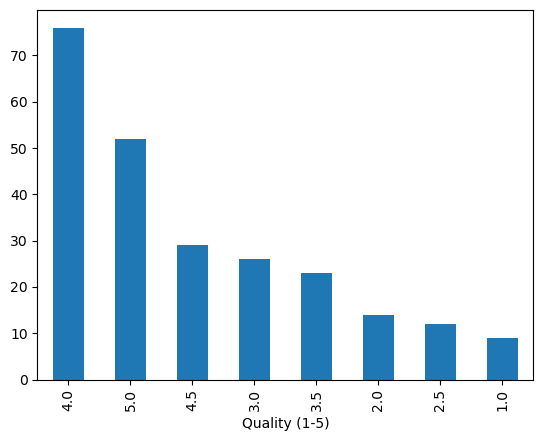

In [15]:
df["Quality (1-5)"].value_counts().plot.bar()

In [25]:
test_df = df[["Blemishes (Y/N)", "Variety", "Color", "Quality (1-5)"]]

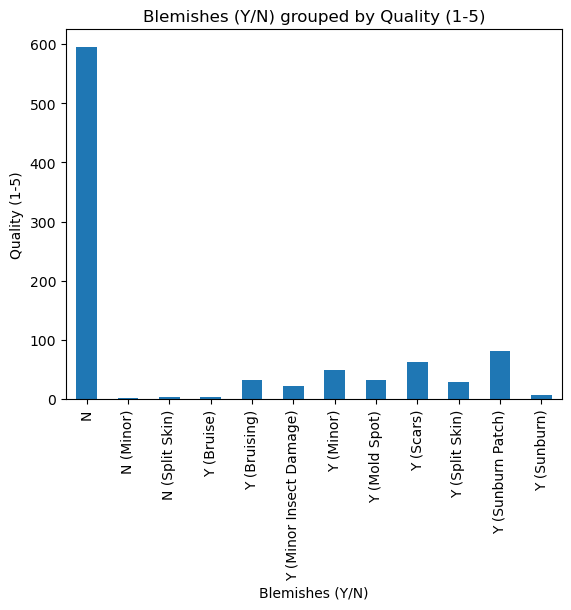

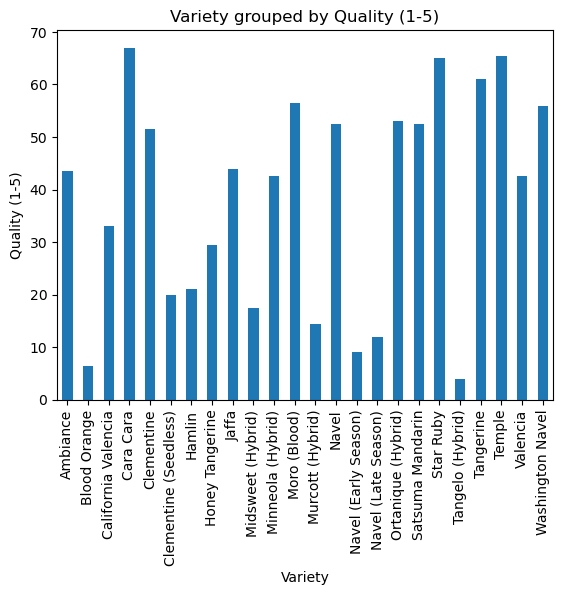

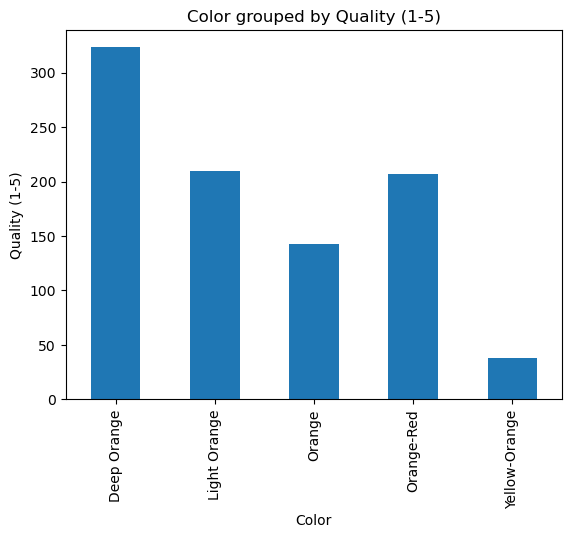

In [29]:

interested_columns = test_df.columns[:-1]

for col in interested_columns:
  grouped_df = test_df.groupby(col)["Quality (1-5)"].sum()
  grouped_df.plot(kind="bar", x =col, y ="Quality (1-5)")
  plt.title(f"{col} grouped by Quality (1-5)")
  plt.xlabel(f"{col}")
  plt.ylabel("Quality (1-5)")
  plt.show()

In [34]:
test_df.sort_values("Quality (1-5)",ascending=False)

,Blemishes (Y/N),Variety,Color,Quality (1-5)
51,N,Satsuma Mandarin,Light Orange,5.0
193,N,Star Ruby,Deep Orange,5.0
69,N,Temple,Deep Orange,5.0
112,Y (Split Skin),Ambiance,Orange-Red,5.0
189,Y (Split Skin),Star Ruby,Deep Orange,5.0
...,...,...,...,...
199,N,Washington Navel,Light Orange,1.0
119,N,Satsuma Mandarin,Light Orange,1.0
5,N,Navel,Orange,1.0
212,N,Minneola (Hybrid),Light Orange,1.0
